In [1]:
# IMPORTANT NOTE: The OpenAI API library changed a lot after 1.0.0, so make sure you have the latest version installed.
# This code will not work with OpenAI API version < 1.0.0
# Upgrade with the following command: pip install --upgrade openai

import openai
import pickle

with open('apikey.txt', 'r') as f:
    openai.api_key = f.read()

In [2]:
# How much it costs to embed 1000 tokens
# https://openai.com/pricing#language-models
dollars_per_1000_tokens = 0.0001 
total_tokens = 0

In [3]:
# Calling the embedding tokenizer
response = openai.embeddings.create(
  model="text-embedding-ada-002",
  input="The food was delicious and the waiter..."
)

# Convert the response ("CreateEmbeddingResponse" object) to a Python dictionary
response = response.model_dump()

# Keys of the response dictionary
response.keys()

dict_keys(['data', 'model', 'object', 'usage'])

In [45]:
# Tokens used in the request
tokens_used = response['usage']['total_tokens']
total_tokens += tokens_used # updating total token count
print("Token usage: " + str(tokens_used))

Token usage: 8


In [46]:
# Printing out the final reciept
print("Total tokens used:", total_tokens)
print("Total cost: $" + str(round(total_tokens * dollars_per_1000_tokens / 1000, 5)) + " USD")

Total tokens used: 8
Total cost: $0.0 USD


In [47]:
response.keys()

dict_keys(['data', 'model', 'object', 'usage'])

# Playing with Course Metadata

In [8]:
import json

with open('new_course_metadata.json') as f:
    course_metadata = json.load(f)
print(len(course_metadata.keys()))

4197


In [9]:
len(course_metadata.keys())

4197

In [10]:
course_metadata['CS224V'].keys()

dict_keys(['description', 'subject', 'gers', 'units', 'code', 'days', 'titleSearch', 'title', 'quartersOffered'])

In [11]:
course_metadata['CS224V']['description']

"generative ai, and in particular large language models (llms), has already changed how we work and study.  but this is just the beginning, as it has the potential of assisting and perhaps eventually automating knowledge workers in all areas, from law, medicine, to teaching and mental health therapists.  this course will focus on the general principles and the latest research on methodologies and tools that can be applied to all domains.  this is a project-oriented course, where students will gain hands-on experience in either methodology research or applying the concepts to create useful assistants for a domain of their choice. topics include: (1) growing llms' knowledge through a combination of manual supervised learning and self-learning, (2) stopping llms from hallucination by grounding them with external corpora of knowledge, which is necessary for handling new, live, private as well as long-tail data, (3) handling external data corpora in different domains including structured an

In [12]:
# How much it costs to embed 1000 tokens
# https://openai.com/pricing#language-models
dollars_per_1000_tokens = 0.0001 
total_tokens = 0

In [13]:
# Tokens used in the request
token_counts = list()
skipped_courses = list()
embeddings = dict()

In [15]:
for i, course in enumerate(course_metadata.keys()):
    print(f"Embedding course {i}: {course}")

    # Skipping "phantom" courses
    if type(course_metadata[course]) == type(None):
        skipped_courses.append(course)
        print(f"{course} : Skipping phantom course!")
        print()
        continue

    response = openai.embeddings.create(
      model="text-embedding-ada-002",
      input=course_metadata[course]['description']
    )
    response = response.model_dump()

    # Calculating cost metrics
    tokens_used = response['usage']['total_tokens']
    token_counts.append(tokens_used)
    total_tokens += tokens_used # updating total token count

    # Saving the embeddings & costs for the course
    embeddings[course] = {'embedding' : response['data'], 'tokens_used' : tokens_used}
    
    print("Token usage: " + str(tokens_used))
    print()

Embedding course 0: EE303
Token usage: 110

Embedding course 1: AMELANG153C
Token usage: 27

Embedding course 2: ITALLANG20
Token usage: 82

Embedding course 3: MATSCI310
Token usage: 72

Embedding course 4: FILMEDIA120
Token usage: 124

Embedding course 5: STATS204
Token usage: 51

Embedding course 6: CS31N
Token usage: 165

Embedding course 7: CHINLANG23
Token usage: 42

Embedding course 8: BIOE177
Token usage: 150

Embedding course 9: MUSIC124A
Token usage: 124

Embedding course 10: DLCL293
Token usage: 70

Embedding course 11: EE60N
Token usage: 101

Embedding course 12: MUSIC160A
Token usage: 174

Embedding course 13: EE180
Token usage: 115

Embedding course 14: MS&E260
Token usage: 67

Embedding course 15: MS&E130
Token usage: 90

Embedding course 16: ESF20A
Token usage: 248

Embedding course 17: MS&E449
Token usage: 121

Embedding course 18: PHIL250
Token usage: 40

Embedding course 19: EPS145Q
Token usage: 215

Embedding course 20: EE374
Token usage: 146

Embedding course 21: U

KeyboardInterrupt: 

In [80]:
# Phantom course
type(course_metadata['EMED110']) == type(None)

True

In [75]:
course_metadata['CS224V'].keys()

dict_keys(['description', 'subject', 'gers', 'units', 'code', 'days', 'titleSearch', 'title', 'quartersOffered'])

In [106]:
course_metadata['PHIL1']

{'description': 'is there one truth or many? does science tell us everything there is to know? can our minds be purely physical? do we have free will? is faith rational? should we always be rational? what is the meaning of life? are there moral truths? what are truth, reality, rationality, and knowledge? how can such questions be answered? intensive introduction to theories and techniques in philosophy from various contemporary traditions. once a week discussions will occur during scheduled meeting time (~50 minutes)',
 'subject': 'PHIL',
 'gers': ['GER:DB-Hum', 'WAY-A-II'],
 'units': [4],
 'code': 'PHIL1',
 'days': ['Tue', 'Thu'],
 'titleSearch': 'introduction to philosophy',
 'title': 'Introduction to Philosophy',
 'quartersOffered': ['Win']}

In [18]:
len(skipped_courses)

43

In [16]:
# Printing out the final reciept
print("Total tokens used:", total_tokens)
print("Total cost: $" + str(round(total_tokens * dollars_per_1000_tokens / 1000, 5)) + " USD")

Total tokens used: 554875
Total cost: $0.05549 USD


### Exporting Embeddings

Constructing Filename

In [30]:
from datetime import datetime

# Get the current date and time
now = datetime.now()

# Format the date and time as a string
date_time = now.strftime("%Y-%m-%d_%H-%M-%S")

# Construct the file name with the date and time
file_name = f"embeddings_{date_time}.pkl"

Pickling `embeddings`

In [31]:
# Open a file for writing
with open(file_name, 'wb') as f:
    # Pickle the embeddings using the highest protocol available
    pickle.dump(embeddings, f, pickle.HIGHEST_PROTOCOL)

In [17]:
len(embeddings)

4154

# Visualization

In [4]:
# Open the file for reading
with open('embeddings_2023-12-05.pkl', 'rb') as f:
    # Unpickle the embeddings
    embeddings = pickle.load(f)

In [5]:
list(embeddings.keys())[0:10]

['EE303',
 'AMELANG153C',
 'ITALLANG20',
 'MATSCI310',
 'FILMEDIA120',
 'STATS204',
 'CS31N',
 'CHINLANG23',
 'BIOE177',
 'MUSIC124A']

In [6]:
embeddings['CS224V'].keys()

dict_keys(['embedding', 'tokens_used'])

In [7]:
embeddings['CS224V']['embedding']

[{'embedding': [-0.024666106328368187,
   0.014709271490573883,
   0.009826724417507648,
   -0.014106657356023788,
   -0.006101471837610006,
   0.027460046112537384,
   -0.032349441200494766,
   0.018201695755124092,
   -0.024926327168941498,
   -0.0463191419839859,
   0.008292797021567822,
   0.009949986822903156,
   -0.01639385335147381,
   0.017174512147903442,
   0.004851731471717358,
   -0.009539113380014896,
   0.02680264785885811,
   0.0011059344979003072,
   0.019105618819594383,
   -0.019721928983926773,
   0.00225809239782393,
   -0.0020440956577658653,
   -0.007868227548897266,
   -0.0282954890280962,
   0.0017684680642560124,
   0.006871859543025494,
   0.011634568683803082,
   -0.042265187948942184,
   -0.018215391784906387,
   -0.0011376059846952558,
   0.014928404241800308,
   -0.0008037713123485446,
   -0.008799540810286999,
   -0.014366877265274525,
   0.004916786216199398,
   -0.008436602540314198,
   0.03248639777302742,
   0.010086944326758385,
   0.0116756558418273

In [ ]:
embeddings

## Dimensionality Reduction

## Autoencoder

In [21]:
# What you need to do to acccess the actual embeddings (list of len 1536)
embeddings['CS224V']['embedding'][0]['embedding']

[-0.024666106328368187,
 0.014709271490573883,
 0.009826724417507648,
 -0.014106657356023788,
 -0.006101471837610006,
 0.027460046112537384,
 -0.032349441200494766,
 0.018201695755124092,
 -0.024926327168941498,
 -0.0463191419839859,
 0.008292797021567822,
 0.009949986822903156,
 -0.01639385335147381,
 0.017174512147903442,
 0.004851731471717358,
 -0.009539113380014896,
 0.02680264785885811,
 0.0011059344979003072,
 0.019105618819594383,
 -0.019721928983926773,
 0.00225809239782393,
 -0.0020440956577658653,
 -0.007868227548897266,
 -0.0282954890280962,
 0.0017684680642560124,
 0.006871859543025494,
 0.011634568683803082,
 -0.042265187948942184,
 -0.018215391784906387,
 -0.0011376059846952558,
 0.014928404241800308,
 -0.0008037713123485446,
 -0.008799540810286999,
 -0.014366877265274525,
 0.004916786216199398,
 -0.008436602540314198,
 0.03248639777302742,
 0.010086944326758385,
 0.011675655841827393,
 -0.01735255867242813,
 0.016667768359184265,
 0.015133840963244438,
 0.010655319318175

In [217]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pickle
import matplotlib.pyplot as plt


In [231]:

'''# Define a dataset class that will feed our embeddings to the autoencoder
class EmbeddingDataset(Dataset):
    def __init__(self, embeddings):
        self.embeddings = embeddings
        self.ids = list(embeddings.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        course_id = self.ids[idx]
        embedding = self.embeddings[course_id]['embedding']
        return torch.tensor(embedding, dtype=torch.float)'''

class EmbeddingDataset(Dataset):
    def __init__(self, embeddings):
        self.embeddings = embeddings
        self.ids = list(embeddings.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        course_id = self.ids[idx]
        embedding = self.embeddings[course_id]['embedding'][0]['embedding']
        if embedding is None or not isinstance(embedding, list):
            raise TypeError(f"The embedding for {course_id} is not a list.")
        return torch.tensor(embedding, dtype=torch.float)



# Create the dataset
dataset = EmbeddingDataset(embeddings)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [249]:
# Initial stab at building the autoencoder
'''class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(1536, 512),
            nn.ReLU(True),
            nn.Linear(512, 32),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 512),
            nn.ReLU(True),
            nn.Linear(512, 1536),
            nn.Sigmoid() # Using Sigmoid since embeddings might be normalized
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x'''

# Model type that first started to work
    
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(1536, 512, bias=False),
            nn.Linear(512, 8, bias=False),
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 512, bias=False),
            nn.Linear(512, 1536, bias=False),
        )

        # Initialize the weights using Glorot initialization
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        # Maybe add layer norm here?
        return x
    

# Use for models with <= 32 dimensions

class Autoencoder2(nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(1536, 512, bias=False),
            nn.Linear(512, 32, bias=False),
            nn.Linear(32, 4, bias=False),
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 32, bias=False),
            nn.Linear(32, 512, bias=False),
            nn.Linear(512, 1536, bias=False),
        )

        # Initialize the weights using Glorot initialization
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        # Maybe add layer norm here?
        return x

Using device: cpu

Epoch 1/25 Loss: 0.0003
Epoch 2/25 Loss: 0.0002
Epoch 3/25 Loss: 0.0001
Epoch 4/25 Loss: 0.0001
Epoch 5/25 Loss: 0.0001
Epoch 6/25 Loss: 0.0001
Epoch 7/25 Loss: 0.0001
Epoch 8/25 Loss: 0.0001
Epoch 9/25 Loss: 0.0001
Epoch 10/25 Loss: 0.0001
Epoch 11/25 Loss: 0.0001
Epoch 12/25 Loss: 0.0001
Epoch 13/25 Loss: 0.0001
Epoch 14/25 Loss: 0.0001
Epoch 15/25 Loss: 0.0001
Epoch 16/25 Loss: 0.0001
Epoch 17/25 Loss: 0.0001
Epoch 18/25 Loss: 0.0001
Epoch 19/25 Loss: 0.0001
Epoch 20/25 Loss: 0.0001
Epoch 21/25 Loss: 0.0001
Epoch 22/25 Loss: 0.0001
Epoch 23/25 Loss: 0.0001
Epoch 24/25 Loss: 0.0001
Epoch 25/25 Loss: 0.0001


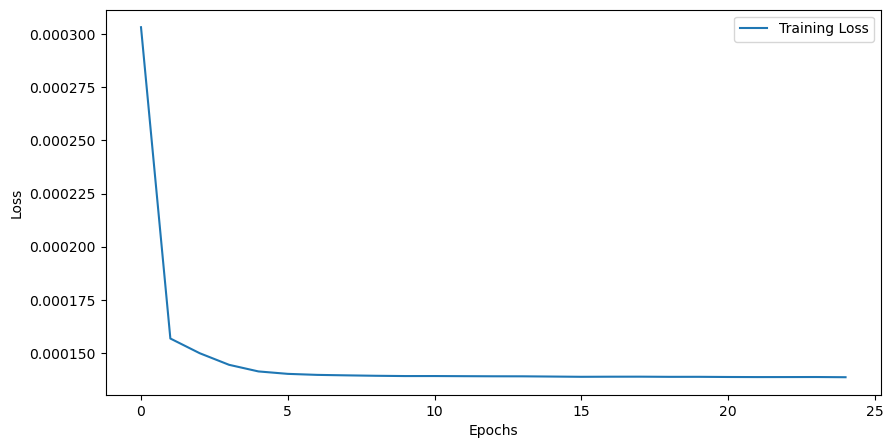

In [250]:
# Instantiate the model
model = Autoencoder2()

# setting device on GPU if available, else CPU
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
print('Using device:', device)
print()
if device.type == 'cuda':
    model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Function to train the autoencoder
def train_autoencoder(model, dataloader, criterion, optimizer, epochs=20):
    losses = []
    for epoch in range(epochs):
        running_loss = 0.0
        for data in dataloader:
            # Move the data to the GPU
            data = data.to(device)
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, data)
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            # Statistics
            running_loss += loss.item()
        epoch_loss = running_loss / len(dataloader)
        losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{epochs} Loss: {epoch_loss:.4f}')
    return losses

# Train the model (for a small number of epochs for example purposes)
losses = train_autoencoder(model, dataloader, criterion, optimizer, epochs=25)

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [251]:
# Put the model in evaluation mode
model.eval()

# Create a new DataLoader for inference
inference_dataloader = DataLoader(dataset, batch_size=32, shuffle=False)


In [252]:
# Original embeddings (just for comparison)
original_embeddings = []
# Collect the reduced embeddings
reduced_embeddings = []
# Reconstructed embeddings (back to full dimensionality of 1536)
reconstructed_embeddings = []

with torch.no_grad():  # No need to track gradients during inference
    for data in inference_dataloader:
        data = data.to(device)
        original_embeddings.append(data)
        encoded_embeddings = model.encoder(data)
        reduced_embeddings.append(encoded_embeddings.cpu())
        reconstructed_embedding = model.decoder(encoded_embeddings)
        reconstructed_embeddings.append(reconstructed_embedding.cpu())

# Concatenate the list of tensors into a single tensor
original_embeddings = torch.cat(original_embeddings, dim=0)
reduced_embeddings = torch.cat(reduced_embeddings, dim=0)
reconstructed_embeddings = torch.cat(reconstructed_embeddings, dim=0)

In [253]:
test_idx = 70

In [254]:
# Convert the tensor of reduced embeddings to a list for inspection
original_embeddings_list = original_embeddings.tolist()
reduced_embeddings_list = reduced_embeddings.tolist()
reconstructed_embeddings_list = reconstructed_embeddings.tolist()

# Inspect the first reduced embedding
print(reduced_embeddings_list[test_idx])

[0.1985291689634323, 0.15115435421466827, -0.025288226082921028, 0.25373420119285583]


In [255]:
print("Original embedding:")
print(original_embeddings[test_idx])
print("Reconstructed embedding:")
print(reconstructed_embeddings[test_idx])

Original embedding:
tensor([ 0.0220, -0.0012,  0.0073,  ..., -0.0142, -0.0251, -0.0295])
Reconstructed embedding:
tensor([ 0.0018, -0.0131,  0.0040,  ..., -0.0115, -0.0052, -0.0323])


In [256]:
reduced_embeddings.shape

torch.Size([4154, 4])

# Exporting Embeddings to File

In [257]:
new_embeddings = dict()
for i, course in enumerate(dataset.ids):
    # Each class (course: string) will be mapped to a list of x floats (the reduced embedding)
    new_embeddings[course] = reduced_embeddings_list[i]

In [258]:
len(new_embeddings['EE303'])

4

### Pickling File

In [259]:
from datetime import datetime

# Get the current date and time
now = datetime.now()

# Format the date and time as a string
date_time = now.strftime("%Y-%m-%d_%H-%M-%S")

size = 4

# Construct the file name with the date and time
file_name = f"embeddings{size}_{date_time}.pkl"

In [260]:
# Open a file for writing
with open(file_name, 'wb') as f:
    # Pickle the embeddings using the highest protocol available
    pickle.dump(new_embeddings, f, pickle.HIGHEST_PROTOCOL)

: 

In [60]:
reduced_embeddings.shape

torch.Size([4154, 2])

In [38]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()


#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Using device: cuda

NVIDIA GeForce RTX 3050 Ti Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


c:\Users\chris\anaconda3\envs\test_gpu\lib\site-packages\torch\cuda\memory.py:416: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(
